# The Task

This project is centered around exploratory data analysis techniques. I used the the King County Housing Data: This dataset contains information about home sales in King County (USA). It is a predominantly urban and suburban county. Through EDA/statistical analysis above I came up with the overall data.

There is more information about the county here: https://de.wikipedia.org/wiki/King_County_(Washington)

In addition I also came up with three recommendations for my client Jennifer Montgomery, who wants to buy a house in the King County Area.


# Set Programming Environment

In [1]:
#set environment

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import of the Data

I loaded the data from `data.csv` into a pandas data frame. I connected and retrieved the data via `sqlalchemy` and then I imported that engine with a query into a pandas dataframe.  After that I exported the data into a .csv file. With my SQL Query i joined two tables on the IDs and i renamed and ordered the columns.

In [2]:
#import the data from a csv-file
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,house_id_sales,house_id_details,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
0,7129300520,7129300520,1,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,6414100192,2,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,5631500400,3,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,2487200875,4,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,1954400510,5,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


# Understanding
First of all i wanted to get an overview of the data.

In [4]:
# returns a tuple representing the number of rows and columns
df.shape

(21597, 23)

We have 21597 observations and 23 characteristics.

In [5]:
# concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_id_sales    21597 non-null  int64  
 1   house_id_details  21597 non-null  int64  
 2   sales_id          21597 non-null  int64  
 3   bedrooms          21597 non-null  float64
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  float64
 6   sqft_lot          21597 non-null  float64
 7   floors            21597 non-null  float64
 8   waterfront        19206 non-null  float64
 9   view              21534 non-null  float64
 10  condition         21597 non-null  int64  
 11  grade             21597 non-null  int64  
 12  sqft_above        21597 non-null  float64
 13  sqft_basement     21145 non-null  float64
 14  yr_built          21597 non-null  int64  
 15  yr_renovated      17749 non-null  float64
 16  zipcode           21597 non-null  int64 

In [6]:
# provides the data types of each column in the DataFrame
df.dtypes

house_id_sales        int64
house_id_details      int64
sales_id              int64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_lot            float64
floors              float64
waterfront          float64
view                float64
condition             int64
grade                 int64
sqft_above          float64
sqft_basement       float64
yr_built              int64
yr_renovated        float64
zipcode               int64
lat                 float64
long                float64
sqft_living15       float64
sqft_lot15          float64
sale_date            object
price               float64
dtype: object

The following method checks for any missing values and returns their sum. It is important to get rid of missing values to create an accurate model.

In [7]:
# helps identify the number of missing (null) values
df.isnull().sum()

house_id_sales         0
house_id_details       0
sales_id               0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront          2391
view                  63
condition              0
grade                  0
sqft_above             0
sqft_basement        452
yr_built               0
yr_renovated        3848
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
sale_date              0
price                  0
dtype: int64

In [8]:
null_perc = round(100*(df.isnull().sum()/len(df.index)),2)
null_perc

house_id_sales       0.00
house_id_details     0.00
sales_id             0.00
bedrooms             0.00
bathrooms            0.00
sqft_living          0.00
sqft_lot             0.00
floors               0.00
waterfront          11.07
view                 0.29
condition            0.00
grade                0.00
sqft_above           0.00
sqft_basement        2.09
yr_built             0.00
yr_renovated        17.82
zipcode              0.00
lat                  0.00
long                 0.00
sqft_living15        0.00
sqft_lot15           0.00
sale_date            0.00
price                0.00
dtype: float64

We see that waterfront has 11% missing data and yr_renovated has almost 18% missing data.

# Cleaning the data
Before exploring and analyzing the data through EDA, data cleaning is necessary. It involves identifying and resolving data quality issues such as missing values, outliers, and duplicates.

In [9]:
df.head()

,house_id_sales,house_id_details,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
0,7129300520,7129300520,1,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,6414100192,2,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,5631500400,3,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,2487200875,4,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,1954400510,5,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


### Fix column names formats
As we can see the column names are in a well structered format.


### Dealing with duplicates
Check how many duplicated rows exist in the data frame

In [10]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

As we can see there are no duplicated rows.

### Data Types and Transforming Data
One Part of Data Cleaning is to get the data types into the right shape. This is import so we can work better with the data later on.

In [11]:
# check data types in data frame
df.dtypes

house_id_sales        int64
house_id_details      int64
sales_id              int64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_lot            float64
floors              float64
waterfront          float64
view                float64
condition             int64
grade                 int64
sqft_above          float64
sqft_basement       float64
yr_built              int64
yr_renovated        float64
zipcode               int64
lat                 float64
long                float64
sqft_living15       float64
sqft_lot15          float64
sale_date            object
price               float64
dtype: object

As we can see sale_date is an object. We will look at this more closely to see what data type Pandas identifies our current date entry as. To do this, we can simply take the first entry.

In [12]:
# type of first date entry
type(df['sale_date'][0])

str

In [13]:
# We can change the string to a date time
df['sale_date'] = pd.to_datetime(df['sale_date'], format='%Y-%m-%d')

# check "date" dtype
type(df['sale_date'][0])


pandas._libs.tslibs.timestamps.Timestamp

yr_rennovated is float but should be da int object

In [14]:
# replace the 0 an divide it by 10
df["yr_renovated"] = df["yr_renovated"].replace(0, np.nan)/10

df.head(20)


,house_id_sales,house_id_details,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
0,7129300520,7129300520,1,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,0.0,1955,NaN,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,6414100192,2,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,5631500400,3,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,2487200875,4,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,910.0,1965,NaN,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,1954400510,5,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,1987,NaN,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
5,7237550310,7237550310,6,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,...,1530.0,2001,NaN,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0
6,1321400060,1321400060,7,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,...,NaN,1995,NaN,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0
7,2008000270,2008000270,8,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,...,0.0,1963,NaN,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0
8,2414600126,2414600126,9,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,...,730.0,1960,NaN,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0
9,3793500160,3793500160,10,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,...,0.0,2003,NaN,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0


### Missing Data and Imputing
Dealing with missing values is a crucial aspect of data cleaning and preprocessing, as missing data can lead to biased analysis and inaccurate results.

In [15]:
# import missingno
import missingno as msno

# display number of missing values per column
df.isna().sum()

house_id_sales          0
house_id_details        0
sales_id                0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront           2391
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement         452
yr_built                0
yr_renovated        20853
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
sale_date               0
price                   0
dtype: int64

<Axes: >

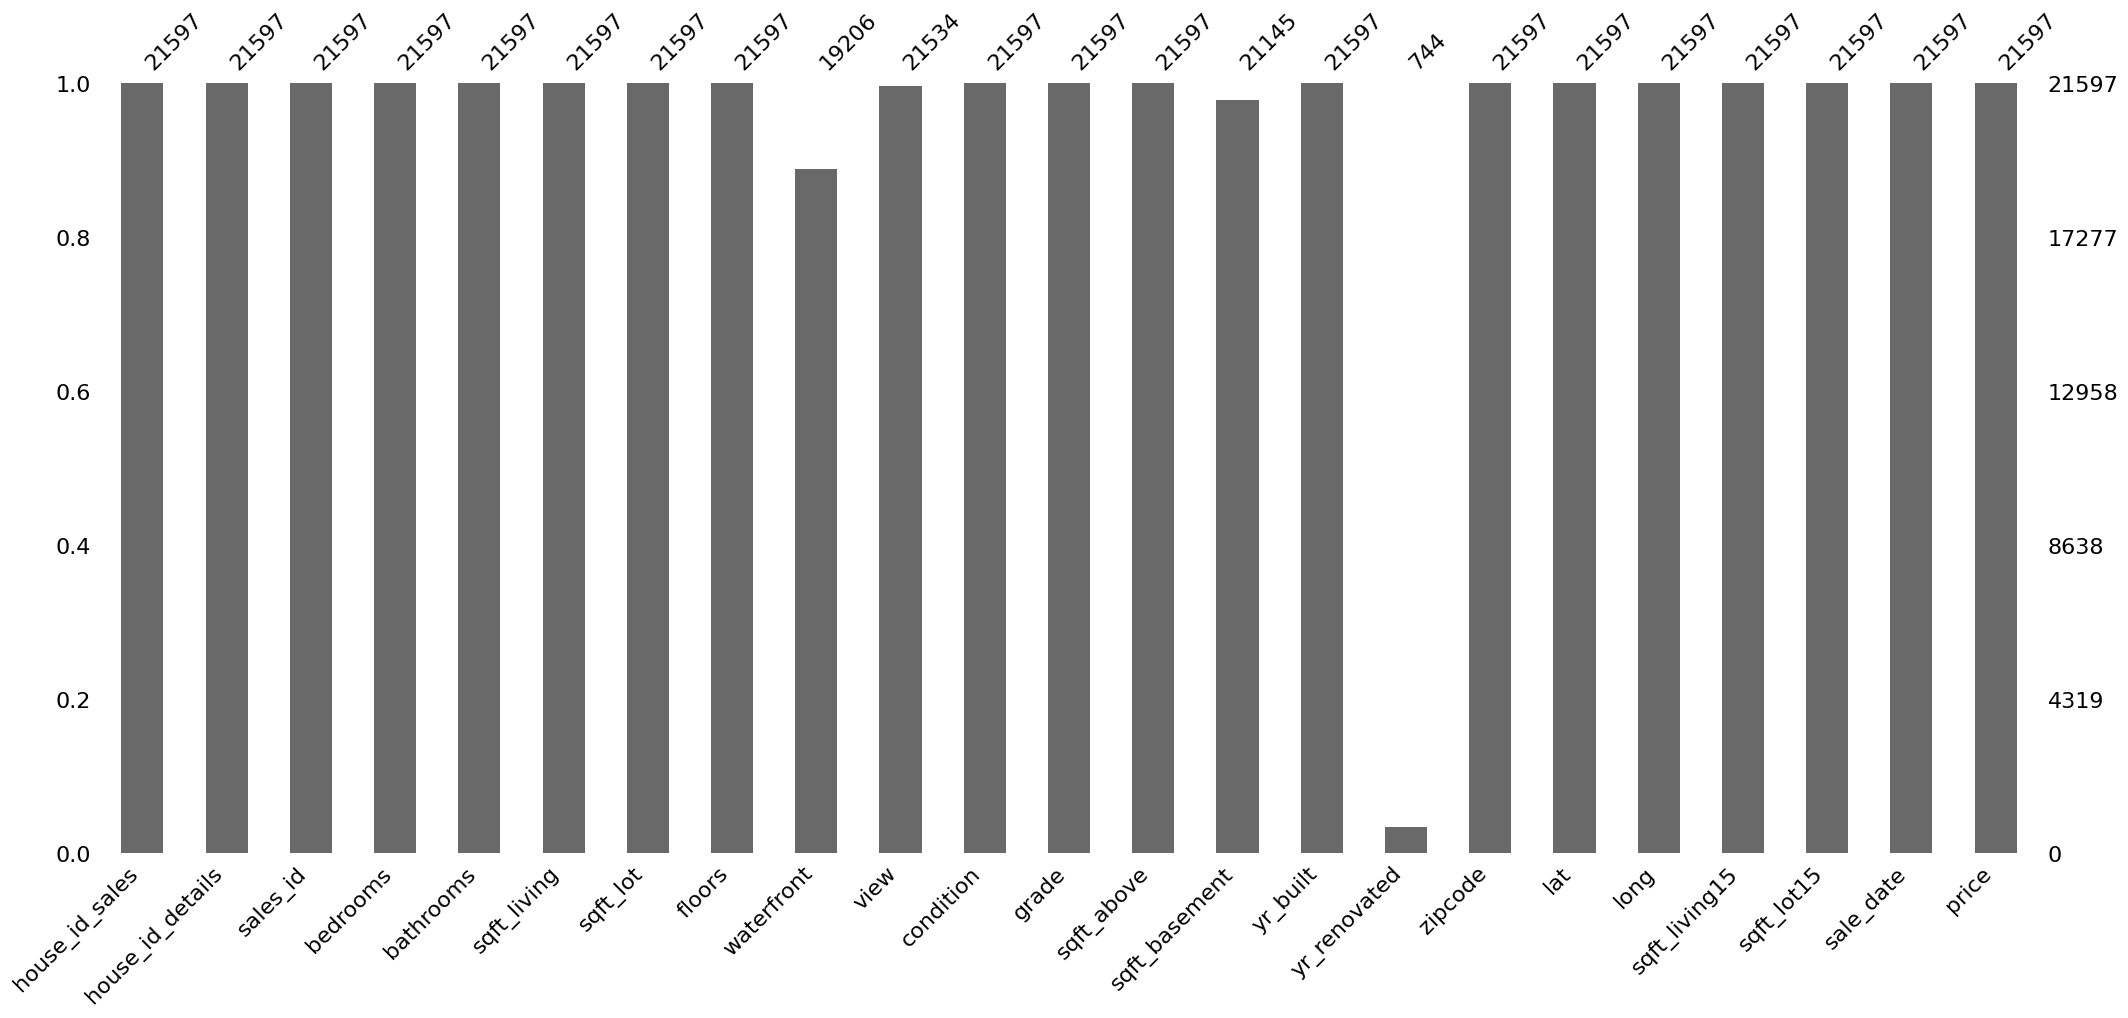

In [16]:
# plotting percentage of missing values per column
msno.bar(df)

As we can see there is missing data in:
* waterfront
* view
* sqft_basement
* yr_renovated

In [17]:
# waterfront is float but should be boolean
# I assume that when no waterfront is in the data the house doesn`t have a waterfront
# replace the <NA> to False

df['waterfront'] = df['waterfront'].fillna(0)

# Replace `0` with `pd.NA` to standardize missing values
df['waterfront'] = df['waterfront'].replace(0, pd.NA)

# Convert to boolean: True for any year, False for NA
df['waterfront'] = df['waterfront'].notna()

# check "waterfront" dtype
type(df['waterfront'][1])


numpy.bool

In [18]:
# I assume that when no view is in the data the house doesn`t have a view
# replace the <NA> to False

df["view"] = df["view"].fillna(0)


In [19]:
# I assume that when no sqft_basement is in the data the house doesn`t have sqft_basement
# replace the <NA> to False

df["sqft_basement"] = df["sqft_basement"].fillna(0)

In [20]:
# I assume that when no yr_renovated is in the data the house was not rennovated
# replace the <NA> to False

df["yr_renovated"] = df["yr_renovated"].fillna(0)

# Replace `0` with `pd.NA` to standardize missing values
df['yr_renovated'] = df['yr_renovated'].replace(0, pd.NA)

# Convert to boolean: True for any year, False for NA
df['yr_renovated'] = df['yr_renovated'].notna()



# Explore
Exploring the data is the next step in the EDA process. It helps to identify patterns and trends and forms the basis of the data analysis phase.


# Univariate Analysis

The price is going to be the dependent variable **which is influence by other variables like number of bedrooms,bathrooms, condition,grade, waterfront,etc.**

For a better analysis i created a new dataframe, which dropped some irrelevant features like 
* house_id_sales
* house_id_details
* sales_id
* sales date

In [21]:
data = df.drop(['house_id_sales','house_id_details', 'sales_id', 'sale_date' ],axis = 1)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3.0,1.00,1180.0,5650.0,1.0,False,0.0,3,7,1180.0,0.0,1955,False,98178,47.5112,-122.257,1340.0,5650.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,False,0.0,3,7,2170.0,400.0,1951,True,98125,47.7210,-122.319,1690.0,7639.0,538000.0
2,2.0,1.00,770.0,10000.0,1.0,False,0.0,3,6,770.0,0.0,1933,False,98028,47.7379,-122.233,2720.0,8062.0,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,False,0.0,5,7,1050.0,910.0,1965,False,98136,47.5208,-122.393,1360.0,5000.0,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,False,0.0,3,8,1680.0,0.0,1987,False,98074,47.6168,-122.045,1800.0,7503.0,510000.0


In [22]:
# quick overview of the distribution of the data
data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,285.748993,1970.999676,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,439.824566,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [23]:
print(data['price'].describe().round())

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64


In [24]:
#median of the prices
print(data['price'].median().round())

450000.0


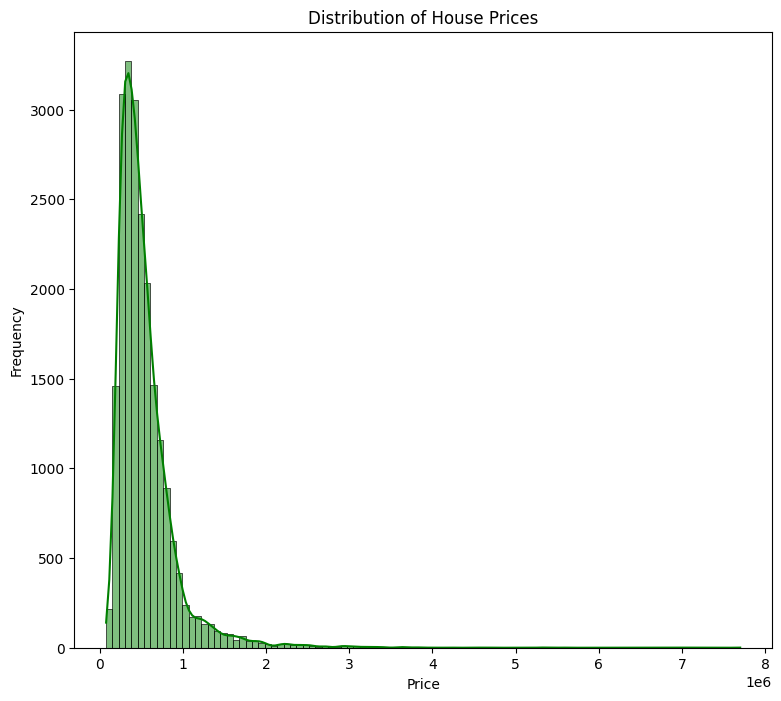

In [25]:
# distribution of the house prices
plt.figure(figsize=(9, 8))
sns.histplot(data['price'], color='g', bins=100, kde=True, alpha=0.5)

plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

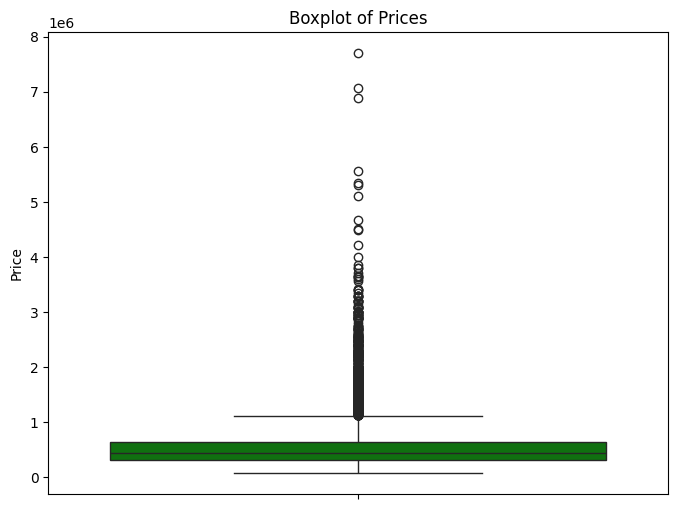

In [26]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='price', color='g')

plt.title('Boxplot of Prices')
plt.ylabel('Price')
plt.show()

# Learnings:

* The average house price is $540,297 (the national average house price in the U.S. around 2015 was approximately $360,000).
* The high average suggests that Seattle's housing prices tend to be elevated, possibly influenced by extremely expensive properties.
* The median price is lower than the average, indicating that the price distribution is skewed. A few very expensive properties (outliers) pull the average upwards.
* The interquartile range (IQR), spanning from $322,000 to $645,000, represents the price range in which the majority of houses are located.
* A large standard deviation reveals significant variability in house prices, ranging from affordable to extremely expensive properties.
* Outliers: The gap between the median and mean, as well as the high maximum value, suggests a few high-value homes significantly impact the average. For a more accurate representation of typical prices, the median is more reliable.


# Check the other variables

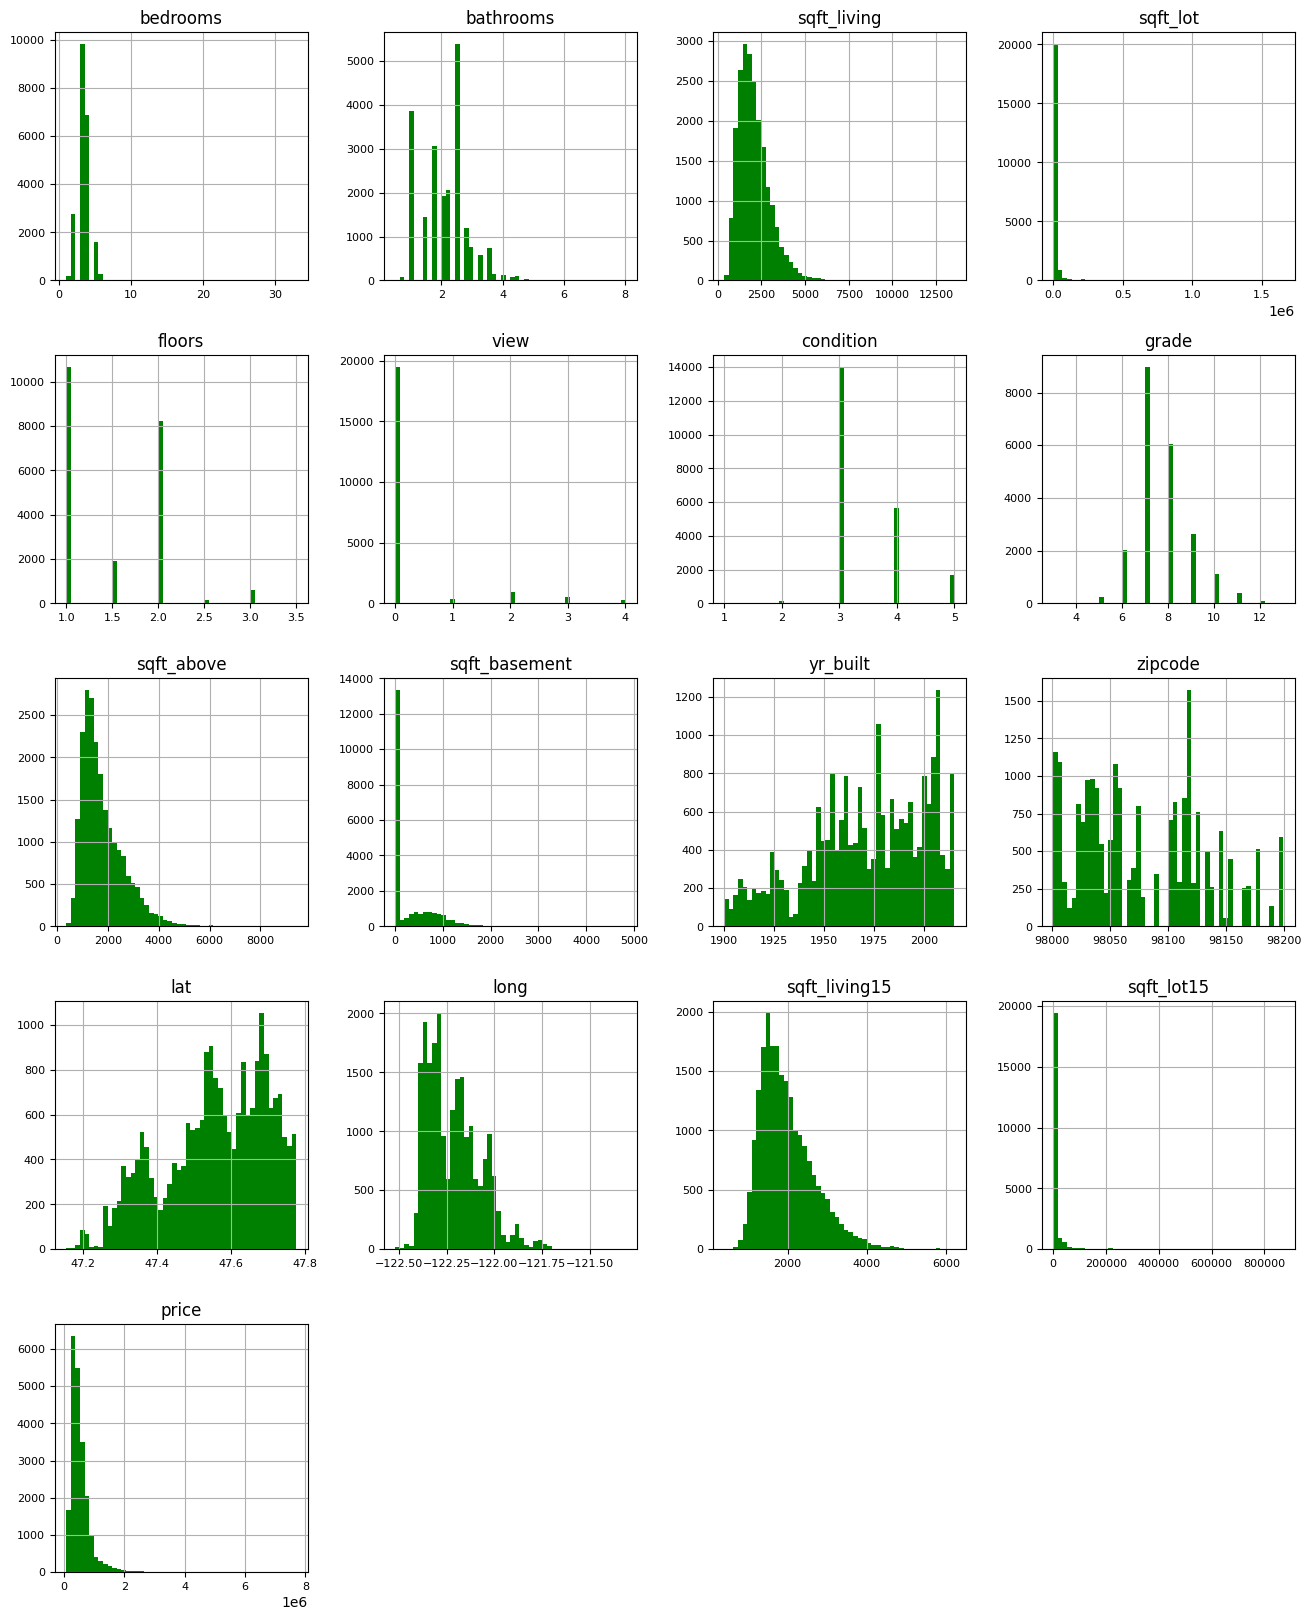

In [27]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='g');

Features like `sqft_living`, `sqft_above`, `sqft_living15` seems to share a similar distribution to the one we have with `SalePrice`. Lets see if we can find new clues later.

# Multivariate Analysis

Now we'll try to find which features are strongly correlated with Price. We'll store them in a var called corr_list_above. We'll reuse our data dataset to do so.

In [28]:
data_corr = data.corr()['price'][:-1]
corr_list = data_corr.sort_values(ascending=False)
corr_list

sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321066
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022037
zipcode         -0.053402
Name: price, dtype: float64

As we can see there are features, which are higher correlated than 0.5 like:
* sqft_living
* grade
* sqft_above
* sqft_living15
* bathrooms

In [29]:
corr_list_above = corr_list[abs(corr_list) > 0.5].sort_values(ascending=False)
corr_list_above

sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
Name: price, dtype: float64

Perfect, we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:
* Plot the numerical features and see which ones have very few or explainable outliers
* Remove the outliers from these features and see which one can have a good correlation without their outliers

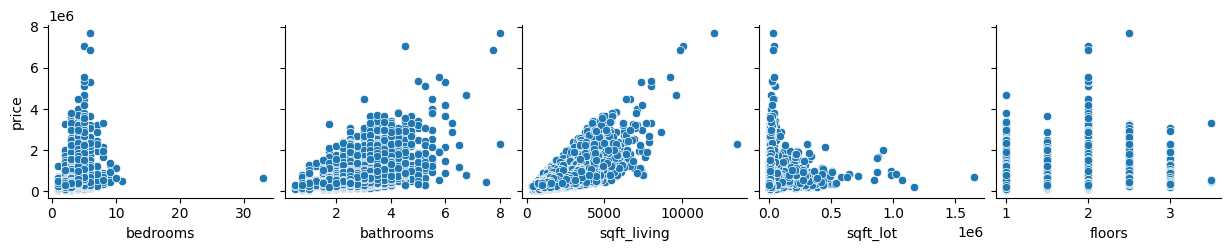

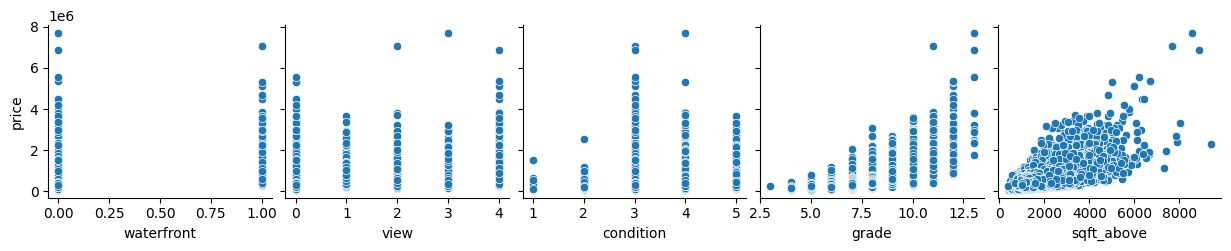

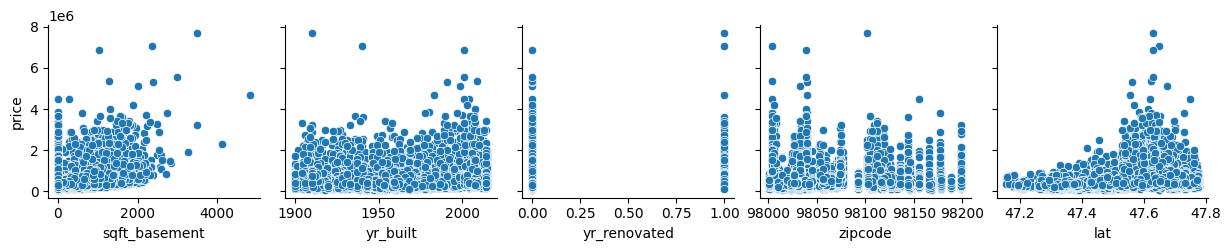

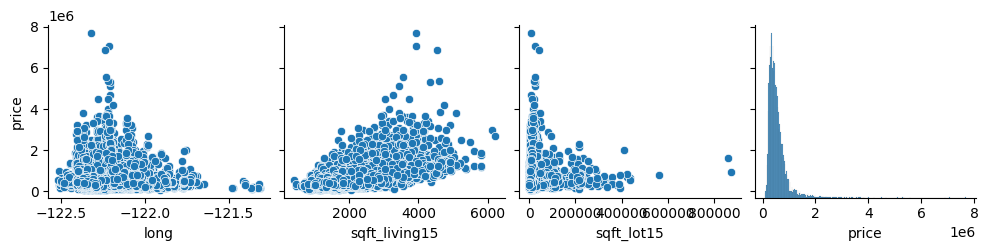

In [30]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['price'])

We can clearly see some relationships:
* `sqft_living` seems to have a linear relationship with `price`
* `bathrooms` seems to have a linear relationship with `price`
* `grade` seems to have a linear relationship with `price`
* `sqft_above` seems to have a linear relationship with `price`

As `waterfront` and `yr_renovated` are bool we need to do further investigations

### Waterfront

In [31]:
# Mean
mean_prices = df.groupby("waterfront")["price"].mean().round(0)
print(mean_prices)

waterfront
False     532286.0
True     1717215.0
Name: price, dtype: float64


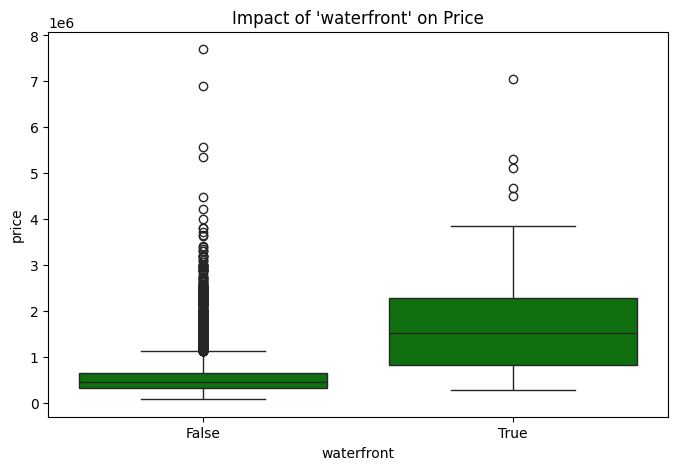

In [32]:
sns.boxplot(data=df, x="waterfront", y="price", color='g')
plt.title("Impact of 'waterfront' on Price")
plt.show()


As we can see the means of houses with and without waterfront are different. Houses with waterfront are three times more expensive in average.

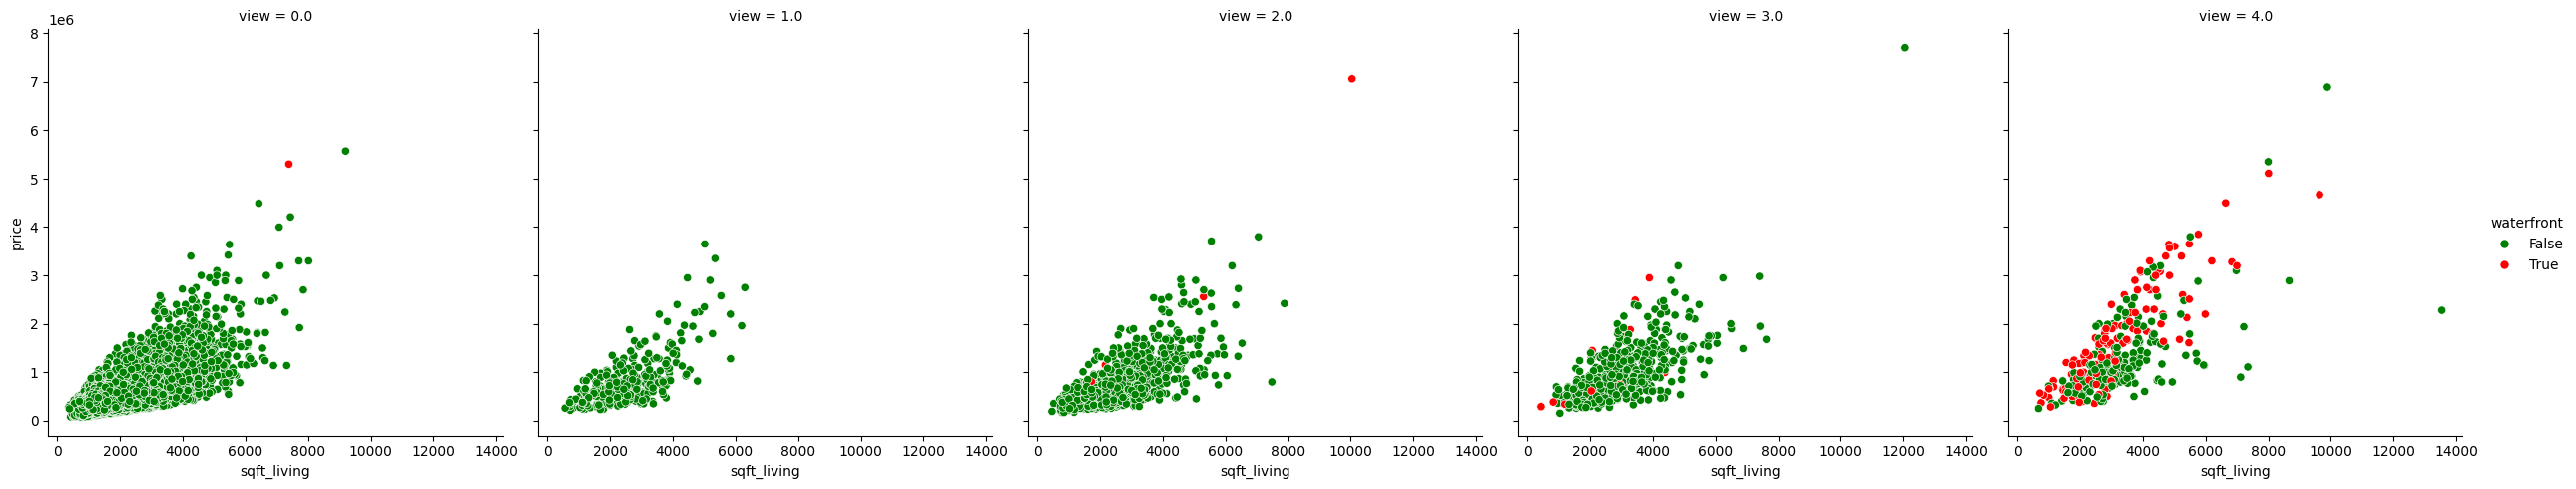

In [33]:
sns.relplot(x="sqft_living",y="price",hue="waterfront",col="view",palette=["g", "r"],data=data);

* For houses in a similar area, a very good view of the waterfront puts the price up 

### Year Renovated


In [34]:
# Mean
mean_yr_renovated = df.groupby("yr_renovated")["price"].mean().round()
print(mean_yr_renovated)

yr_renovated
False    532140.0
True     768902.0
Name: price, dtype: float64


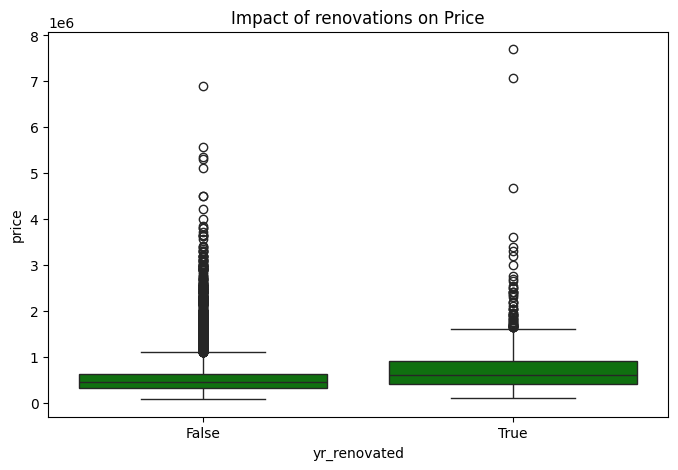

In [35]:
sns.boxplot(data=df, x="yr_renovated", y="price", color='g')
plt.title("Impact of renovations on Price")
plt.show()

As we can see the means are quite the same. I assume that there is no impact on the price.

### Grade an Price

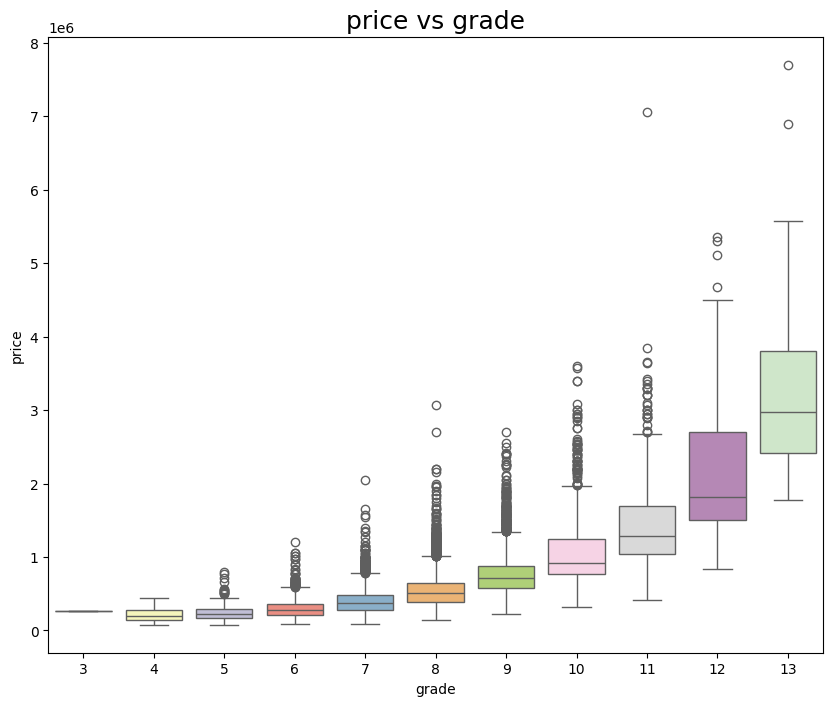

In [36]:
plt.subplots(figsize=(10,8))

sns.boxplot(x="grade", y = "price",data= data,palette="Set3")

plt.title('price vs grade',size = 18)
plt.show()

* As we have seen in the correlation, there is a relationship between price and grade
* better materials and building structure are higher in prices

### Number of Bedrooms and Price

In [37]:
# unique values of bedrooms
data['bedrooms'].unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

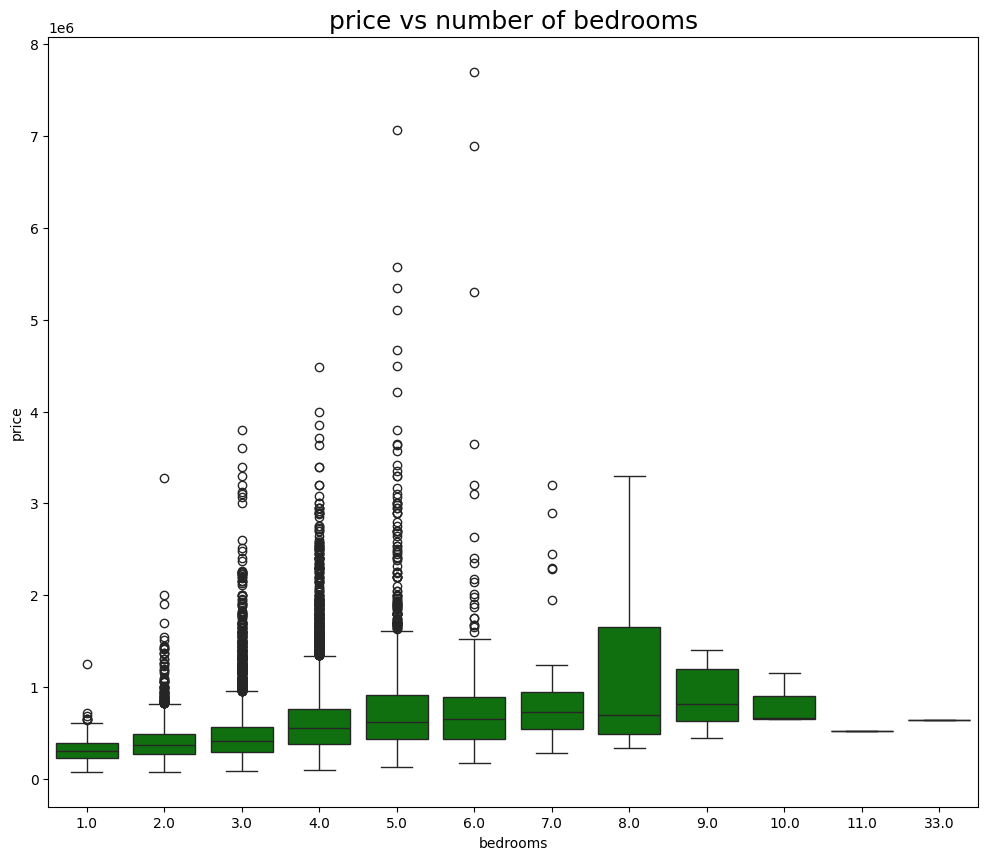

In [38]:
plt.subplots(figsize=(12,10))

sns.boxplot(x="bedrooms", y = "price", data= data, color = "g")

plt.title('price vs number of bedrooms',size = 18)
plt.show()

* average of 3 to 4 bedrooms
* There are a lot of outliers
* certain houses in the Greater Seattle Area might naturally be more expensive than a suburban house with more number of bedrooms.

### Number of Bathrooms and Price

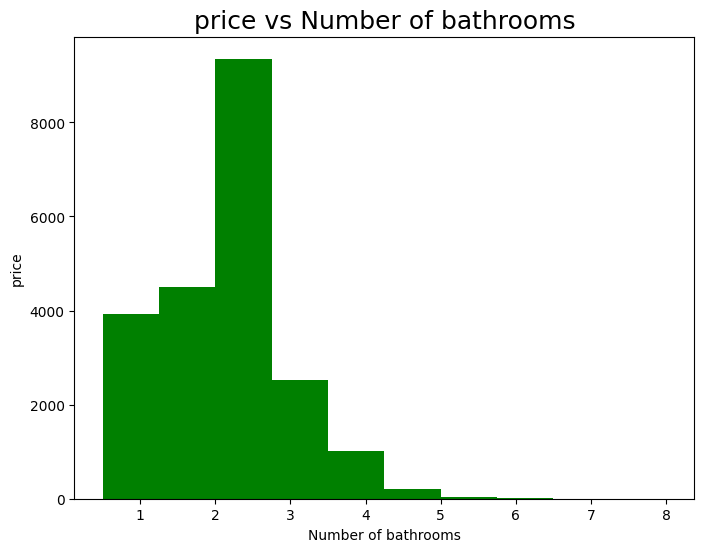

In [39]:
plt.subplots(figsize=(8,6))

_=plt.hist(data['bathrooms'],color='g')
_=plt.xlabel('Number of bathrooms')
_=plt.ylabel('price')

plt.title('price vs Number of bathrooms',size = 18)
plt.show()

* There a houses with 2 bathrooms which are higher in price than houses with 4 or 5 bathrooms
* This indicates that houses in the urban area with less bathrooms are more expensive

### Year built

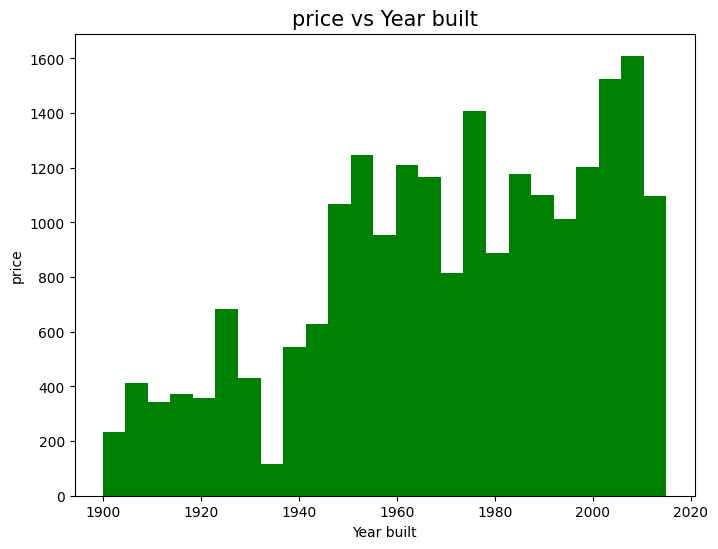

In [40]:
plt.subplots(figsize=(8,6))

_=plt.hist(data['yr_built'],color='g', bins=25)
_=plt.xlabel('Year built')
_=plt.ylabel('price')

plt.title('price vs Year built',size = 15)
plt.show()

* a lot of houses were built in the 2000s and 2010s

## Feature to feature relationship



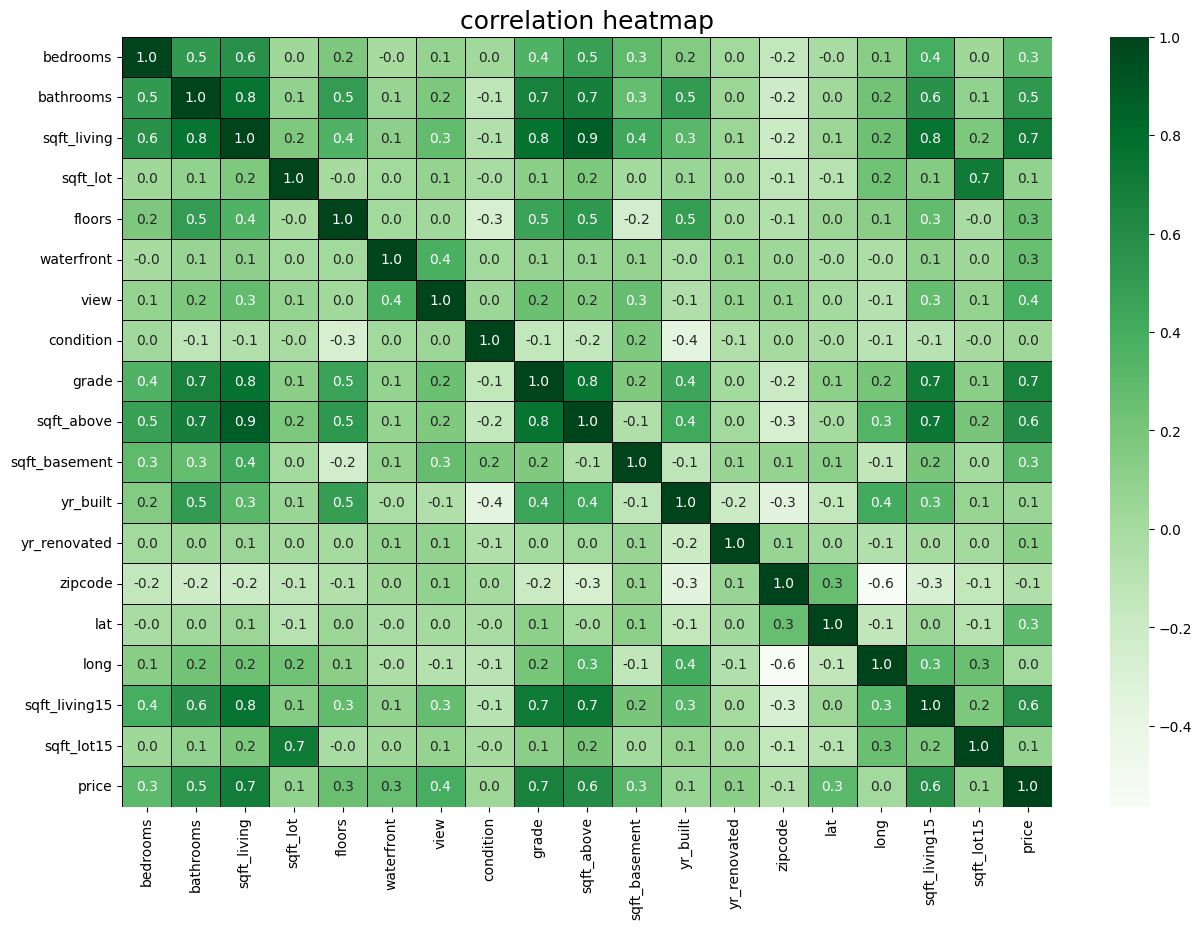

In [41]:
#change the size of the figure using this matplotlib me.thod
plt.subplots(figsize=(15,10))

#plot a correalation heatmap using seaborn. Border the squares with black color, show the correaltion index and round it up.
sns.heatmap(data.corr(), annot = True,linewidths=.5,linecolor='black',fmt = '1.1f', cmap="Greens")

#give a title to the map and display it.
plt.title('correlation heatmap',size = 18)
plt.show()

We can see that there are some relationships between the features. Like `sqft_above` and `sqft_living`, which makes sense because these are just bigger houses then. There is also a relationship between `sqft_living` and `sqft_living15` which says that bigger houses are located near bigger houses.

### Living Area and Lot Size in the Proximity and the Price

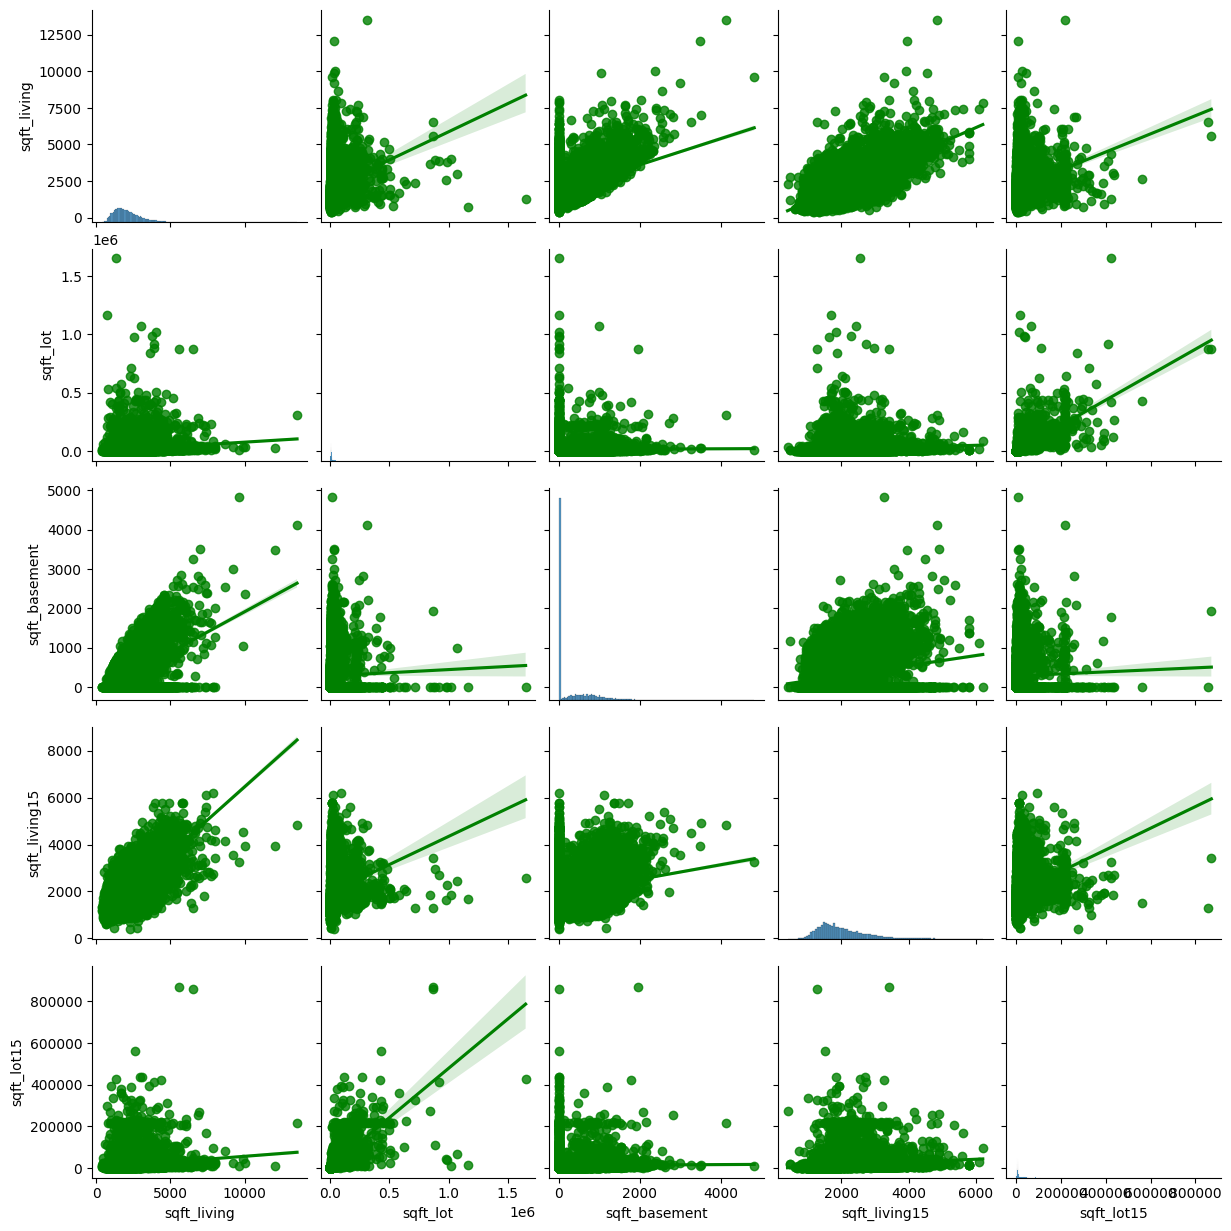

In [42]:
sns.pairplot(
    data, 
    vars=["sqft_living", "sqft_lot", "sqft_basement", "sqft_living15", "sqft_lot15"], 
    kind="reg", 
    plot_kws={"scatter_kws": {"color": "g"}, "line_kws": {"color": "g"}}
)

plt.show()

* As we expected there is a lot correlation between `sqft_living` and other variables like `sqft_lot`, `sqft_basement` and `sqft_living15`, `sqft_lot15`
* A living area indicates more space for basement and larger lot.
* Houses which are close to each other are in the similar area and similar in price
* This could be a clustering of similar houses

# Recommendations for my Client

My Client Jennifer Montgomery asked me to come up with at least three recommendations. She wanted to buy a house in King County,Washington. 

Here are some key fact about Jennifer Montgomery:
* She is a Buyer
* High budget
* wants to show off
* timing within a month
* waterfront
* renovated
* high grades
* resell within 1 year


### Renovated
As she wanted a renovated house, we can filter our data frame to all the renovated houses.

In [43]:
df.columns

Index(['house_id_sales', 'house_id_details', 'sales_id', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'sale_date', 'price'],
      dtype='object')

In [44]:
# Filter the df
df_client = df[df['yr_renovated'] == True]

df_client.shape


(744, 23)

### High grades
She also wanted a house with high grades, so we can filter our data set to the houses with high grades (grade = 12, 13)

In [45]:
# Filter the df
df_client = df_client[(df_client['grade'] == 12) | (df_client['grade'] == 13)  | (df_client['grade'] == 10) | (df_client['grade'] == 11)]

df_client.shape


(59, 23)

### Resell within 1 year

She also want to resell within a year for this I check with houses are resold within one year beforehand.

As she wants a house to show of and a high budget i check for houses which are sold within one year and to which price so i can see which houses at which prices are possible to sell within one year. As i assume that selling expensive houses within one year is difficult.

In [46]:
# Sort by house_id and sale_date
df = df.sort_values(by=['house_id_sales', 'sale_date'])

# Find resales within a year
df['resale_within_year'] = df.groupby('house_id_sales')['sale_date'].diff().dt.days <= 365

# Filter houses that were resold within a year
resold_houses = df[df['resale_within_year'].fillna(False)]

# Sort by the 'price' column in descending order and limit to the top 10
top_resold_houses = resold_houses.sort_values(by='price', ascending=False).head(10)

top_resold_houses.head(11)

,house_id_sales,house_id_details,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price,resale_within_year
4918,9809000020,9809000020,4919,5.0,2.25,3120.0,16672.0,2.0,False,0.0,...,1969,False,98004,47.6458,-122.219,3740.0,17853.0,2015-03-13,1940000.0,True
14295,3528000040,3528000040,14296,3.0,3.25,5290.0,224442.0,2.0,False,0.0,...,1988,False,98053,47.6671,-122.051,3750.0,84936.0,2015-03-26,1800000.0,True
2563,7856400240,7856400240,2564,4.0,3.00,3900.0,9750.0,1.0,False,4.0,...,1972,False,98006,47.5605,-122.158,3410.0,9450.0,2015-02-11,1650000.0,True
18977,7856400300,7856400300,18978,2.0,2.50,3180.0,9400.0,2.0,False,4.0,...,1985,False,98006,47.5617,-122.158,3760.0,9450.0,2015-03-22,1510000.0,True
314,4139480200,4139480200,315,4.0,3.25,4290.0,12103.0,1.0,False,3.0,...,1997,False,98006,47.5503,-122.102,3860.0,11244.0,2014-12-09,1400000.0,True
7839,4139420590,4139420590,7840,4.0,3.50,4560.0,16643.0,1.0,False,3.0,...,1995,False,98006,47.5521,-122.115,4060.0,15177.0,2014-08-27,1200000.0,True
15999,5536100020,5536100020,16000,3.0,2.00,2160.0,15788.0,1.0,False,0.0,...,1951,False,98004,47.6227,-122.207,2260.0,9787.0,2015-05-12,1190000.0,True
13722,5332200530,5332200530,13723,5.0,2.50,2350.0,4000.0,2.0,False,0.0,...,1993,False,98112,47.6265,-122.296,1840.0,4000.0,2015-04-24,1020000.0,True
4074,3262300940,3262300940,4075,3.0,1.00,1220.0,8119.0,1.0,False,0.0,...,1955,False,98039,47.6328,-122.236,1910.0,8119.0,2015-02-10,940000.0,True
3296,7409700215,7409700215,3297,3.0,1.50,1900.0,5000.0,1.5,False,0.0,...,1926,False,98115,47.6779,-122.294,2090.0,5000.0,2015-03-13,921500.0,True


As we can see that there was a house resold within one year at a price 1940000 Dollars. So we can filter our recommendations just to see houses which are cheaper than 1940000 Dollars.

In [47]:
# Filter the df
df_client = df_client[(df_client['price'] < 2000000.0)]

df_client.shape


(40, 23)

### Timing within one month

As the client wanted to move in the house within one month. I assume that we need a house in a good condition so that we do not need to renovate before my client moves in.

In [48]:
df_client.condition.value_counts()

condition
3    34
4     3
5     3
Name: count, dtype: int64

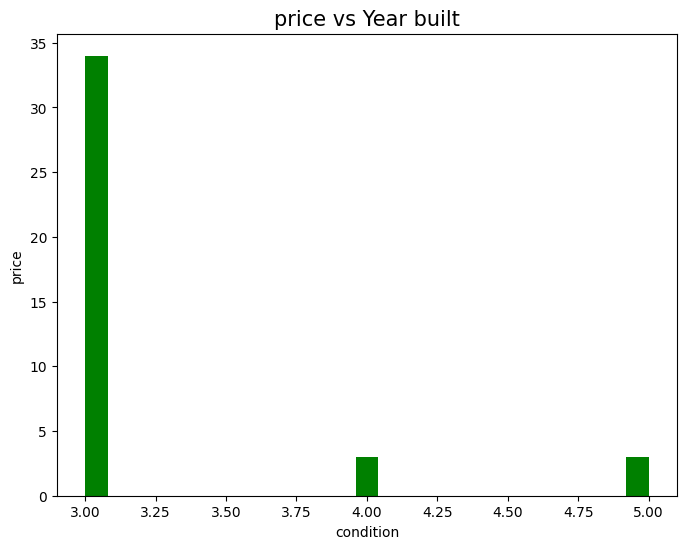

In [49]:
plt.subplots(figsize=(8,6))

_=plt.hist(df_client['condition'],color='g', bins=25)
_=plt.xlabel('condition')
_=plt.ylabel('price')

plt.title('price vs Year built',size = 15)
plt.show()

As we can see the condition is good at all houses in the list. So we don`t need to filter.

### Waterfront

As we can remember there were a lot missing values in the origin data set. So we need to see the Houses on the Map.

In [53]:
df_client_sorted = df_client.sort_values("price",ascending=False)
df_client_sorted.head()

,house_id_sales,house_id_details,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
556,5486800070,5486800070,557,7.0,3.50,4640.0,15235.0,2.0,False,1.0,...,1780.0,1965,True,98040,47.5666,-122.231,3230.0,20697.0,2014-06-20,1950000.0
8901,1118001560,1118001560,8902,4.0,3.00,4460.0,6833.0,2.0,False,0.0,...,1320.0,1955,True,98112,47.6342,-122.289,3130.0,7450.0,2014-07-10,1910000.0
17445,3625700010,3625700010,17446,5.0,4.00,4510.0,15175.0,2.0,False,0.0,...,0.0,1969,True,98040,47.5309,-122.228,3510.0,13500.0,2014-05-06,1870000.0
13971,4094800120,4094800120,13972,5.0,3.00,3880.0,13000.0,2.0,False,0.0,...,0.0,1972,True,98040,47.5467,-122.234,3470.0,13701.0,2014-06-19,1820000.0
9544,9320100090,9320100090,9545,5.0,3.25,5270.0,17232.0,2.0,False,1.0,...,1260.0,1977,True,98040,47.5536,-122.228,3550.0,13917.0,2014-06-10,1800000.0


In [51]:
avg_latitude = df_client['lat'].mean() # starting point - exact locations not important
avg_longitude = df_client['long'].mean()
import geojson
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/refs/heads/master/wa_washington_zip_codes_geo.min.json"
fig = px.choropleth_mapbox(df_client, 
                           geojson=url_geojson, 
                           locations='zipcode', featureidkey='properties.ZCTA5CE10',
                           color='price',
                           mapbox_style="carto-positron",
                           zoom=9, center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           height=900,
                           width=900,
                           hover_data={'zipcode': False, 'price': True, 'lat': False, 'long': False} 
                          )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2 = px.scatter_mapbox(df_client, lat="lat", lon="long", color_discrete_sequence=["green"], zoom=3, height=400, width= 600, hover_data='price')
fig2.update_layout(mapbox_style="open-street-map")
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

for trace in fig2.data: 
    fig.add_trace(trace)
fig.show()

In order to find three recommendations for my Client, i came up with two houses, which met the wishes of my client:
1. house_id = 3343302110
2. house_id = 6117502230

As there is a little number ob houses with a waterfront, i needed to pass over the other criteria and my third house is:

3. house_id = 4114601580

In [57]:
df_client_final = df[(df['house_id_sales'] == 3343302110) | (df['house_id_sales'] == 6117502230)  | (df['house_id_sales'] == 4114601580)]

df_client_final.head()

,house_id_sales,house_id_details,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price,resale_within_year
8775,3343302110,3343302110,8776,3.0,3.0,2790.0,13295.0,2.0,True,4.0,...,1933,True,98006,47.5466,-122.197,3140.0,11949.0,2015-03-06,1800000.0,False
12447,4114601580,4114601580,12448,6.0,4.0,3020.0,13237.0,2.0,True,4.0,...,1942,True,98144,47.5924,-122.287,3680.0,12620.0,2014-07-24,1900000.0,False
15678,6117502230,6117502230,15679,3.0,3.5,4660.0,21164.0,2.0,True,4.0,...,1975,True,98166,47.4418,-122.354,3140.0,24274.0,2014-12-01,1640000.0,False
